**1.LOAD FASHION MNIST DATASET**

Import libraries

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from collections import Counter
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [118]:
#pip install tensorflow matplotlib

Load the dataset

In [119]:
# Load the Fashion MNIST dataset and split it into training and testing sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Fashion MNIST comes with a predefined set of class names that correspond to each label in the dataset.

In [120]:
#class names correspond to the following labels:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Get the shape of the training and test sets

In [121]:

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


Find the number of unique classes

In [122]:
num_of_classes = len(np.unique(y_train))
print("Number of classes:", num_of_classes)

Number of classes: 10


2. **DATA PREPROCESSING**

Reshaping the data

In [123]:
# Reshape the training data (X_train) and testing data (X_test)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Training data scaling and augmentation

In [124]:
# Create an ImageDataGenerator for data augmentation (for processing training set)
training_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True)

training_set_scale = training_datagen.flow(X_train, y_train, batch_size=32)

Scaling the test data

In [125]:
# Create an ImageDataGenerator for preprocessing the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_set_scale = test_datagen.flow(X_test, y_test, batch_size=32)

datagen is to increase the diversity of the training data and improve the model's generalization ability.

convert the labels to one-hot encoaded vectors

In [126]:
#y_train = to_categorical(y_train, num_of_classes)
#y_test = to_categorical(y_test, num_of_classes)


print the shape of the processed data

In [127]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)


**3. VISUALIZATION**

####Print some image samples with labels

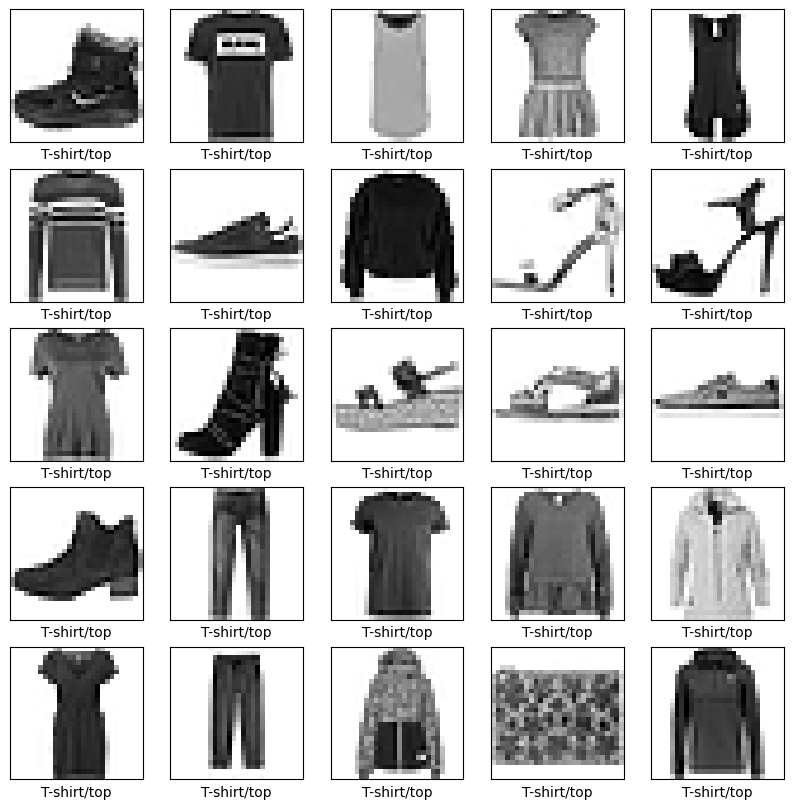

In [135]:
# Display sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

Bar chart showing the distribution of samples across different classes

In [136]:
#y_train_flattened = y_train.flatten().astype(np.int64)
# Count the occurrences of each class label
#class_counts = np.bincount(y_train.flatten().astype(np.int64), minlength=10)



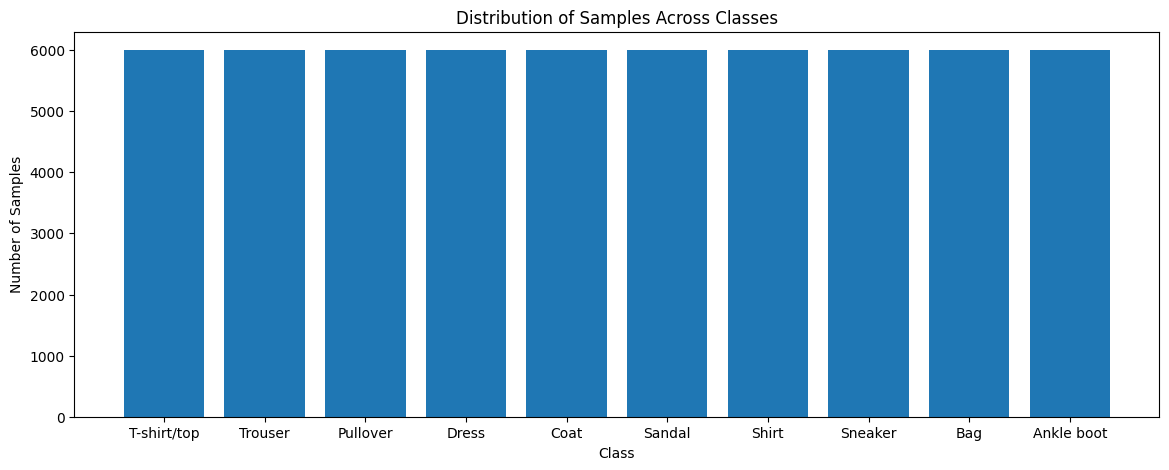

In [137]:

#Bar chart showing the distribution of samples across different classes

plt.figure(figsize=(14, 5))
plt.bar(range(10), np.bincount(y_train), tick_label=class_names)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples Across Classes')
plt.show()

**4. BUILD ANN MODEL**

Define the model architecture

In [138]:
model = models.Sequential([

    # Flatten input images to a vector
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # Fully connected layer(1) with 128 units and ReLU activation
     tf.keras.layers.Dense(128, activation='relu'),
    # Fully connected layer(2) with 128 units and ReLU activation
     tf.keras.layers.Dense(64, activation='relu'),

    # Output layer with 10 units for 10 classes and softmax activation
    tf.keras. layers.Dense(10, activation='softmax')
])

Compiling the model

In [139]:
model.compile(optimizer='adam',  # Use the Adam optimizer
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Display summery of the model

In [140]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model Training

In [145]:
# Model training with 30 number of epochs
history = model.fit(training_set_scale, epochs=30, validation_data=test_set_scale)


Epoch 1/30
1875/1875 [==============================] - 28s 14ms/step - loss: 0.6621 - accuracy: 0.7544 - val_loss: 0.5308 - val_accuracy: 0.7926
Epoch 2/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5234 - accuracy: 0.8055 - val_loss: 0.4501 - val_accuracy: 0.8357
Epoch 3/30
1875/1875 [==============================] - 27s 15ms/step - loss: 0.4835 - accuracy: 0.8200 - val_loss: 0.4356 - val_accuracy: 0.8371
Epoch 4/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4569 - accuracy: 0.8286 - val_loss: 0.4128 - val_accuracy: 0.8458
Epoch 5/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4422 - accuracy: 0.8352 - val_loss: 0.4151 - val_accuracy: 0.8468
Epoch 6/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4297 - accuracy: 0.8386 - val_loss: 0.3927 - val_accuracy: 0.8581
Epoch 7/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4182 - accuracy: 0.8441 - val_loss: 0.4096 -

**5.MODEL EVALUATION**

In [146]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_set_scale)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 2s 5ms/step - loss: 0.3431 - accuracy: 0.8745
Test Loss: 0.3431093990802765
Test Accuracy: 0.8744999766349792


Test Set Prediction:

In [147]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


Save the trained model

In [148]:
model.save("/content/drive/MyDrive/NN/fashion_models/cnn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Select some random images

1/1 [==============================] - 0s 30ms/step


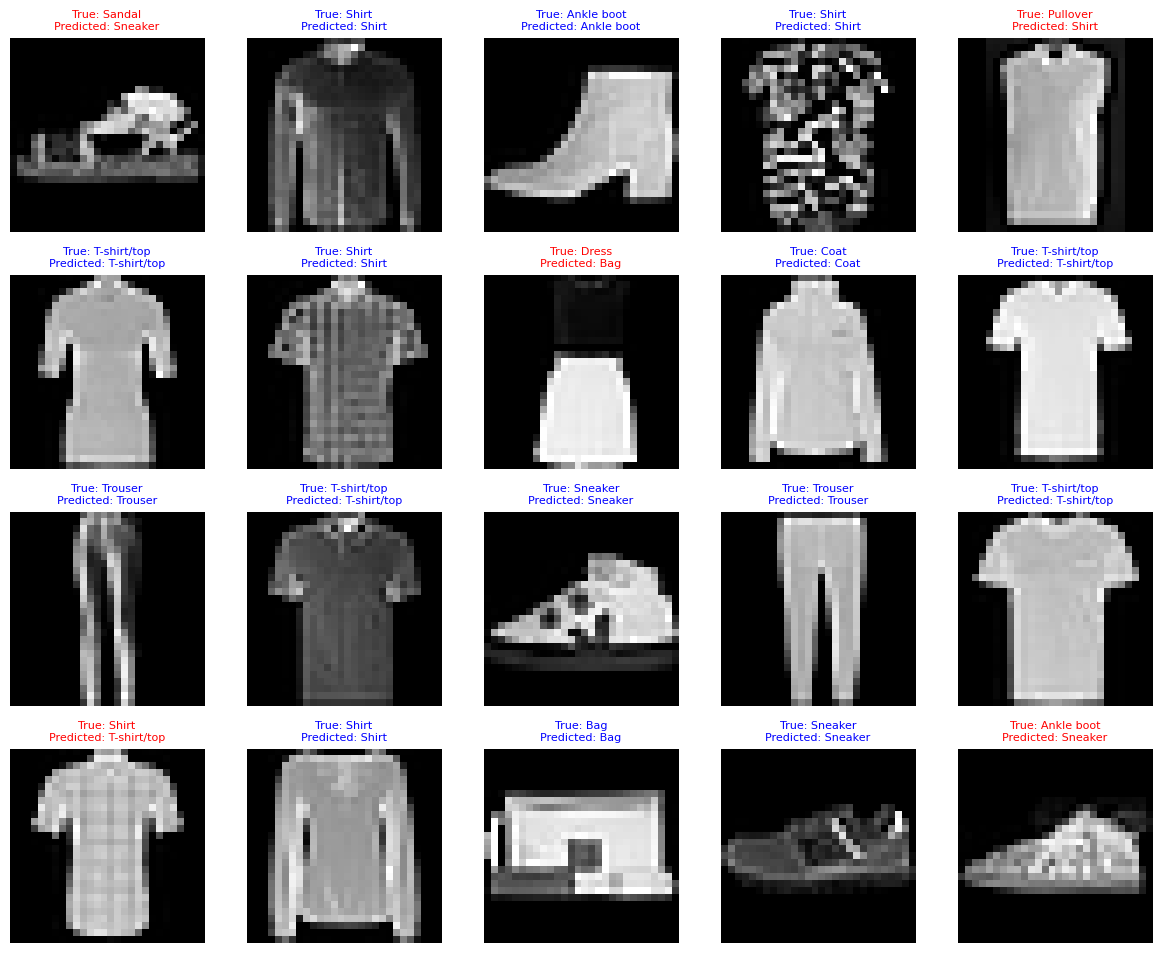

In [149]:
random_images = np.random.randint(0, len(X_test), size=20)
# Preprocess the images and make predictions
plt.figure(figsize=(12, 12))  # Define plot size
for i, random_index in enumerate(random_images):
    random_image = X_test[random_index]
    true_label = y_test[random_index]

    # Preprocess the image
    input_image = np.expand_dims(random_image, axis=0) / 255.0

    # Make prediction
    predicted_label = np.argmax(model.predict(input_image), axis=-1)[0]
    predicted_class = class_names[predicted_label]

    plt.subplot(5, 5, i+1)  # 5 rows, 5 columns, i+1 is the subplot number
    plt.imshow(random_image.squeeze(), cmap='gray')
    plt.axis('off')

    # Color based predictions
    font_color = 'blue' if true_label == predicted_label else 'red'

    plt.title(f"True: {class_names[true_label]}\nPredicted: {predicted_class}", fontsize=8, color=font_color)

plt.tight_layout()
plt.show()



Test set prediction

**SUMMARY**

The fashion mnist dataset is a collection of images which has 10 classes and each contains distinct type of cloth categories. Processing data for ANN Model training included Training data scaling and augmentation and reshaping the data. Some of the images displayed in the part of visualization and a barchart showing the distribution of sample across different classes also visualized.Implimentation of ANN model takes place for classifying fashion mnist images.Compiled the model with appropriate loss function, optimizer, and evaluation metric before training.Compiled the model with the Adam optimizer, categorical crossentropy loss function, and accuracy as the metric to monitor and trained the model using the fit() method, specifying the number of epochs, batch size, and validation split.Here, specifies a validation split of 0.2, meaning 20% of the training data is used for validation.Finally , Calculated and visualized both training and validation losses and accuracy.loss: 0.3431 - accuracy: 0.8745
Test Loss: 0.3431093990802765
Test Accuracy: 0.8744999766349792
Finally , the predicted randomly selected 20 image labels.